In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
random.seed(10)

In [42]:
%run "/content/drive/MyDrive/ethereum_address_space_clustering/helper_functions.py"
%run "/content/drive/MyDrive/ethereum_address_space_clustering/tsne_plotter.py"
%run "/content/drive/MyDrive/ethereum_address_space_clustering/silhoutte_plotter.py"

<Figure size 640x480 with 0 Axes>

In [43]:
dataset = pd.read_csv("/content/drive/MyDrive/ethereum_address_space_clustering/data/eth_dataset_all_features.csv")

In [44]:
dataset.shape

(6057, 30)

In [45]:
dataset.head()

,Unnamed: 0,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,...,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used
0,0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,...,1.333405e+08,314641.354178,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281
1,1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,...,2.131017e+08,556867.740550,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341
2,2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,...,3.184332e+08,537952.716735,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261
3,3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,...,1.722403e+05,745.774408,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40
4,4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,...,6.211858e+05,38.314152,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6057 non-null   int64  
 1   ethereum_address             6057 non-null   object 
 2   ether_balance                6057 non-null   float64
 3   unique_tokens                6057 non-null   int64  
 4   unique_transfers             6057 non-null   int64  
 5   mined_blocks                 6057 non-null   int64  
 6   outgoing_txns                6057 non-null   int64  
 7   incoming_txns                6057 non-null   int64  
 8   total_eth_sent               6057 non-null   float64
 9   avg_eth_sent                 6057 non-null   float64
 10  total_usd_sent               6057 non-null   float64
 11  avg_usd_sent                 6057 non-null   float64
 12  total_eth_recd               6057 non-null   float64
 13  avg_eth_recd      

In [47]:
label_dataset = pd.read_csv("/content/drive/MyDrive/ethereum_address_space_clustering/data/eth_dataset2.csv")

In [48]:
label_dataset.head()

,Address,Name,Account Type,Contract Type,Entity,Label,Tags,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0x8ab7404063ec4dbcfd4598215992dc3f8ec853d7,Akropolis (AKRO),Smart Contract,Token,DeFi,Legit,DeFi,Token Contract,NaN,NaN,NaN,NaN
1,0x1c74cff0376fb4031cd7492cd6db2d66c3f2c6b9,bZx Protocol Token (BZRX),Smart Contract,Token,DeFi,Legit,Token Contract,bZx,DeFi,0x Ecosystem,Trading,Liquidity
2,0x06af07097c9eeb7fd685c692751d5c66db49c215,Chai (CHAI),Smart Contract,Token,DeFi,Legit,DeFi,Token Contract,Verified Contract,NaN,NaN,NaN
3,0xc00e94cb662c3520282e6f5717214004a7f26888,Compound (COMP),Smart Contract,Token,DeFi,Legit,DAO,Compound,Token Contract,NaN,NaN,NaN
4,0xb3319f5d18bc0d84dd1b4825dcde5d5f7266d407,Compound 0x (cZRX),Smart Contract,Token,DeFi,Legit,Token Contract,DeFi,Compound,0x Ecosystem,NaN,NaN


In [49]:
labels = label_dataset[["Address", "Entity"]]

In [50]:
labels.head()

,Address,Entity
0,0x8ab7404063ec4dbcfd4598215992dc3f8ec853d7,DeFi
1,0x1c74cff0376fb4031cd7492cd6db2d66c3f2c6b9,DeFi
2,0x06af07097c9eeb7fd685c692751d5c66db49c215,DeFi
3,0xc00e94cb662c3520282e6f5717214004a7f26888,DeFi
4,0xb3319f5d18bc0d84dd1b4825dcde5d5f7266d407,DeFi


In [51]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19138 entries, 0 to 19137
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Address  19138 non-null  object
 1   Entity   1646 non-null   object
dtypes: object(2)
memory usage: 299.2+ KB


In [52]:
labels.Entity.value_counts()

Entity
DeFi           1046
Exchange        249
ICO Wallets     161
Mining          108
Dex              81
Entity            1
Name: count, dtype: int64

In [53]:
labels = labels.loc[labels["Entity"].isin(["Exchange", "Mining", "ICO Wallets"])]

In [54]:
labels.rename({"Address": "ethereum_address"}, axis=1, inplace=True)

In [55]:
labels.Entity.value_counts()

Entity
Exchange       249
ICO Wallets    161
Mining         108
Name: count, dtype: int64

In [56]:
labels.head()

,ethereum_address,Entity
1128,0x05f51aab068caa6ab7eeb672f88c180f67f17ec7,Exchange
1129,0x2ddd202174a72514ed522e77972b461b03155525,Exchange
1130,0xf0c80fb9fb22bef8269cb6feb9a51130288a671f,Exchange
1131,0x94597850916a49b3b152ee374e97260b99249f5b,Exchange
1132,0x4df5f3610e2471095a130d7d934d551f3dde01ed,Exchange


In [57]:
labeled_dataset = dataset.merge(labels, how="left", on="ethereum_address")
labeled_dataset.drop(["Unnamed: 0"], axis=1, inplace=True)

In [58]:
labeled_dataset.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,1.066724e+09,...,314641.354178,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,2.131017e+09,...,556867.740550,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,3.502765e+09,...,537952.716735,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261,Exchange
3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,1.205682e+06,...,745.774408,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40,NaN
4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,4.969486e+06,...,38.314152,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166,NaN


In [59]:
labeled_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6057 entries, 0 to 6056
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ethereum_address             6057 non-null   object 
 1   ether_balance                6057 non-null   float64
 2   unique_tokens                6057 non-null   int64  
 3   unique_transfers             6057 non-null   int64  
 4   mined_blocks                 6057 non-null   int64  
 5   outgoing_txns                6057 non-null   int64  
 6   incoming_txns                6057 non-null   int64  
 7   total_eth_sent               6057 non-null   float64
 8   avg_eth_sent                 6057 non-null   float64
 9   total_usd_sent               6057 non-null   float64
 10  avg_usd_sent                 6057 non-null   float64
 11  total_eth_recd               6057 non-null   float64
 12  avg_eth_recd                 6057 non-null   float64
 13  total_usd_recd    

In [60]:
labeled_dataset["Entity"].value_counts()

Entity
Exchange       51
Mining         10
ICO Wallets     7
Name: count, dtype: int64

In [61]:
mining_list = [
    "0x00192fb10df37c9fb26829eb2cc623cd1bf599e8",
    "0x002e08000acbbae2155fab7ac01929564949070d",
    "0xc839ee5542b4e8413246b3634c5c739fea949562",
    "0x433022c4066558e7a32d850f02d2da5ca782174d",
    "0xa855c20a1351acd2690c716e2709c7dff3978d12",
    "0xb3b7874f13387d44a3398d298b075b7a3505d8d4",
    "0xff1b891969773159366ab6310ff63a69ac4acffd",
    "0x4ff271d3e8298213be3d88d257f3973a4b6d727b",
    "0x99c85bb64564d9ef9a99621301f22c9993cb89e3",
    "0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb",
    "0xeea5b82b61424df8020f5fedd81767f2d0d25bfb",
    "0x52e44f279f4203dcf680395379e5f9990a69f13c",
    "0x68795c4aa09d6f4ed3e5deddf8c2ad3049a601da",
    "0xf8b483dba2c3b7176a3da549ad41a48bb3121069",
    "0xa42af2c70d316684e57aefcc6e393fecb1c7e84e",
    "0x6a7a43be33ba930fe58f34e07d0ad6ba7adb9b1f",
    "0xe5a349fc4ff853dfdd0b7eaaa9dcd8918e768f49",
    "0x249bdb4499bd7c683664c149276c1d86108e2137",
    "0xcf0e04cc0b8fcd66f42679bce42bf2569f438234",
    "0x2a65aca4d5fc5b5c859090a6c34d164135398226",
    "0x151255dd9e38e44db38ea06ec66d0d113d6cbe37",
    "0xc4aeb20798368c48b27280847e187bb332b9bc77",
    "0xa027231f42c80ca4125b5cb962a21cd4f812e88f",
    "0xf35074bbd0a9aee46f4ea137971feec024ab704e",
    "0x8fce1ef27f3add1411c7a99be402de598ad38389",
    "0x52f13e25754d822a3550d0b68fdefe9304d27ae8",
    "0x8d35067233605bef6069191ae0922d134ff80d48",
    "0x9d551f41fed6fc27b719777c224dfecce170004d",
    "0xea674fdde714fd979de3edf0f56aa9716b898ec8",
    "0xe6a7a1d47ff21b6321162aea7c6cb457d5476bca",
    "0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01",
    "0x6537b65a50a862391515455272f9b6c7168afe94",
    "0xcc22cb1b6625b64e81909456111d76be6158dfbc",
    "0x8595dd9e0438640b5e1254f9df579ac12a86865f",
    "0x829bd824b016326a401d083b33d092293333a830",
    "0x35f61dfb08ada13eba64bf156b80df3d5b3a738d",
    "0xb6cf40aee9990c25d7d6193952af222e120b31c2",
    "0x7f101fe45e6649a6fb8f3f8b43ed03d353f2b90c",
    "0xd34da389374caad1a048fbdc4569aae33fd5a375",
    "0xd0db3c9cf4029bac5a9ed216cd174cba5dbf047c",
    "0x1ad91ee08f21be3de0ba2ba6918e714da6b45836",
    "0x4c549990a7ef3fea8784406c1eecc98bf4211fa5",
    "0x14b30f257c2737370203a15aa343c2b600dfb675",
    "0x9d6d492bd500da5b33cf95a5d610a73360fcaaa0",
    "0xf64f9720cfcb59ca4f5f45e6fdb3f68b875b7295",
    "0x4e4e23ac3c11789e23169025503ea4373b01417",
    "0x7f3b29ae0d5edae9bb148537d4ed2b12beddf8b3",
    "0x6c3183792fbb4a4dd276451af6baf5c66d5f5e48",
    "0xcf6ce585cb4a78a6f96e6c8722927161a696f337",
    "0x09ab1303d3ccaf5f018cd511146b07a240c70294",
    "0x06b8c5883ec71bc3f4b332081519f23834c8706e",
    "0x3ecef08d0e2dad803847e052249bb4f8bff2d5bb",
    "0x2a98776c7e13ed1c240858bd241dcf95fc1928b4",
    "0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5",
    "0x2f979c933aef4fcddd27c0fa5c54d8a780555b0a",
    "0xd5bbb4264b70ca4f58c45d27b9d7e11190754a54",
    "0x6b7d50bb8fab584e54251a10e1c6cfa51dd7b618",
    "0x47c439c8784b44366735fc2cfe08228cb91d5b8e",
    "0xa7b0536fb02c593b0dfd82bd65aacbdd19ae4777",
    "0xe16263ee79b0ee32c242c99f02559e92abaea9eb",
    "0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c",
    "0x1dcb8d1f0fcc8cbc8c2d76528e877f915e299fbe",
    "0x63a9975ba31b0b9626b34300f7f627147df1f526",
    "0xa3c084ae80a3f03963017669bc696e961d3ae5d5",
    "0xd224ca0c819e8e97ba0136b3b95ceff503b79f53",
    "0x44fd3ab8381cc3d14afa7c4af7fd13cdc65026e1",
    "0x9435d50503aee35c8757ae4933f7a0ab56597805",
    "0xd1e56c2e765180aa0371928fd4d1e41fbcda34d4",
    "0x7c6694032b4db11ac485e1cff0f7509d58b41569",
    "0xe4bdced60430a90f31dba03524dd5d15a2670649",
    "0x6a851246689eb8fc77a9bf68df5860f13f679fa0",
    "0x04668ec2f57cc15c381b461b9fedab5d451c8f7f",
]

In [62]:
exchange_list = [
    "0x05f51aab068caa6ab7eeb672f88c180f67f17ec7",
    "0x2ddd202174a72514ed522e77972b461b03155525",
    "0xaecbe94703df39b49ac440feb177c7f1f782c064",
    "0xf0c80fb9fb22bef8269cb6feb9a51130288a671f",
    "0x94597850916a49b3b152ee374e97260b99249f5b",
    "0x82a403c14483931b2ff6e4440c8373ccfee698b8",
    "0x4df5f3610e2471095a130d7d934d551f3dde01ed",
    "0x92dbd8e0a46edd62aa42d1f7902d0e496bddc15a",
    "0xadb72986ead16bdbc99208086bd431c1aa38938e",
    "0x258b7b9a1ba92f47f5f4f5e733293477620a82cb",
    "0x7a10ec7d68a048bdae36a70e93532d31423170fa",
    "0xce1bf8e51f8b39e51c6184e059786d1c0eaf360f",
    "0xf73c3c65bde10bf26c2e1763104e609a41702efe",
    "0x0bb5de248dbbd31ee6c402c3c4a70293024acf74",
    "0xed5cdb0d02152046e6f234ad578613831b9184d4",
    "0xa30d8157911ef23c46c0eb71889efe6a648a41f7",
    "0x6eff3372fa352b239bb24ff91b423a572347000d",
    "0xf7793d27a1b76cdf14db7c83e82c772cf7c92910",
    "0xcce8d59affdd93be338fc77fa0a298c2cb65da59",
    "0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be",
    "0x85b931a32a0725be14285b66f1a22178c672d69b",
    "0x708396f17127c42383e3b9014072679b2f60b82f",
    "0xe0f0cfde7ee664943906f17f7f14342e76a5cec7",
    "0x8f22f2063d253846b53609231ed80fa571bc0c8f",
    "0xd551234ae421e3bcba99a0da6d736074f22192ff",
    "0x564286362092d8e7936f0549571a803b203aaced",
    "0x0681d8db095565fe8a346fa0277bffde9c0edbbf",
    "0xfe9e8709d3215310075d67e3ed32a380ccf451c8",
    "0x4e9ce36e442e55ecd9025b9a6e0d88485d628a67",
    "0xbe0eb53f46cd790cd13851d5eff43d12404d33e8",
    "0xf977814e90da44bfa03b6295a0616a897441acec",
    "0x001866ae5b3de6caa5a51543fd9fb64f524f5478",
    "0xab83d182f3485cf1d6ccdd34c7cfef95b4c08da4",
    "0x4b729cf402cfcffd057e254924b32241aedc1795",
    "0x7c49e1c0e33f3efb57d64b7690fa287c8d15b90a",
    "0x2b49ce21ad2004cfb3d0b51b2e8ec0406d632513",
    "0x5d375281582791a38e0348915fa9cbc6139e9c2a",
    "0x7a91a362d4f2c9c4627688d5b7090bbb12e5715f",
    "0x28ebe764b8f9a853509840645216d3c2c0fd774b",
    "0x7217d64f77041ce320c356d1a2185bcb89798a0a",
    "0x57a47cfe647306a406118b6cf36459a1756823d0",
    "0x1151314c646ce4e0efd76d1af4760ae66a9fe30f",
    "0x742d35cc6634c0532925a3b844bc454e4438f44e",
    "0x876eabf441b2ee5b5b0554fd502a8e0600950cfa",
    "0xab7c74abc0c4d48d1bdad5dcb26153fc8780f83e",
    "0xc6cde7c39eb2f0f0095f41570af89efc2c1ea828",
    "0xdf5021a4c1401f1125cd347e394d977630e17cf7",
    "0x88d34944cf554e9cccf4a24292d891f620e9c94f",
    "0x186549a4ae594fc1f70ba4cffdac714b405be3f9",
    "0xd273bd546b11bd60214a2f9d71f22a088aafe31b",
    "0x3052cd6bf951449a984fe4b5a38b46aef9455c8e",
    "0x2140efd7ba31169c69dfff6cdc66c542f0211825",
    "0xa0ff1e0f30b5dda2dc01e7e828290bc72b71e57d",
    "0xc1da8f69e4881efe341600620268934ef01a3e63",
    "0xb4460b75254ce0563bb68ec219208344c7ea838c",
    "0x15878e87c685f866edfaf454be6dc06fa517b35b",
    "0x31d03f07178bcd74f9099afebd23b0ae30184ab5",
    "0xed48dc0628789c2956b1e41726d062a86ec45bff",
    "0x3fbe1f8fc5ddb27d428aa60f661eaaab0d2000ce",
    "0xe79eef9b9388a4ff70ed7ec5bccd5b928ebb8bd1",
    "0x68b22215ff74e3606bd5e6c1de8c2d68180c85f7",
    "0x03bdf69b1322d623836afbd27679a1c0afa067e9",
    "0x4b1a99467a284cc690e3237bc69105956816f762",
    "0x986a2fca9eda0e06fbf7839b89bfc006ee2a23dd",
    "0x00bdb5699745f5b860228c8f939abf1b9ae374ed",
    "0x1522900b6dafac587d499a862861c0869be6e428",
    "0x9a9bed3eb03e386d66f8a29dc67dc29bbb1ccb72",
    "0x059799f2261d37b829c2850cee67b5b975432271",
    "0x4c766def136f59f6494f0969b1355882080cf8e0",
    "0xc5b611f502a0dcf6c3188fd494061ae29b2baa4f",
    "0x1b8a38ea02ceda9440e00c1aeba26ee2dc570423",
    "0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98",
    "0xe94b04a0fed112f3664e45adb2b8915693dd5ff3",
    "0x66f820a414680b5bcda5eeca5dea238543f42054",
    "0xaa90b4aae74cee41e004bc45e45a427406c4dcae",
    "0xf8d04a720520d0bcbc722b1d21ca194aa22699f2",
    "0xfb9f7f41319157ac5c5dccae308a63a4337ad5d9",
    "0x00cdc153aa8894d08207719fe921fff964f28ba3",
    "0x007174732705604bbbf77038332dc52fd5a5000c",
    "0xdf8752caa319668006580ddf48db25a23728b926",
    "0x1c00d840ccaa67c494109f46e55cfeb2d8562f5c",
    "0x73957709695e73fd175582105c44743cf0fb6f2f",
    "0xd7c866d0d536937bf9123e02f7c052446588189f",
    "0x4dc98c79a52968a6c20ce9a7a08d5e8d1c2d5605",
    "0x88988d6ef12d7084e34814b9edafa01ae0d05082",
    "0x72bcfa6932feacd91cb2ea44b0731ed8ae04d0d3",
    "0x7a56f645dcb513d0326cbaa048e9106ff6d4cd5f",
    "0xfd648cc72f1b4e71cbdda7a0a91fe34d32abd656",
    "0x96fc4553a00c117c5b0bed950dd625d1c16dc894",
    "0x8958618332df62af93053cb9c535e26462c959b0",
    "0xb726da4fbdc3e4dbda97bb20998cf899b0e727e0",
    "0x9539e0b14021a43cde41d9d45dc34969be9c7cb0",
    "0x33683b94334eebc9bd3ea85ddbda4a86fb461405",
    "0xb6ba1931e4e74fd080587688f6db10e830f810d5",
    "0xb9ee1e551f538a464e8f8c41e9904498505b49b0",
    "0x4b01721f0244e7c5b5f63c20942850e447f5a5ee",
    "0xd4bddf5e3d0435d7a6214a0b949c7bb58621f37c",
    "0xf2d4766ad705e3a5c9ba5b0436b473085f82f82f",
    "0xa270f3ad1a7a82e6a3157f12a900f1e25bc4fbfd",
    "0x167a9333bf582556f35bd4d16a7e80e191aa6476",
    "0x1e2fcfd26d36183f1a5d90f0e6296915b02bcb40",
    "0xd0808da05cc71a9f308d330bc9c5c81bbc26fc59",
    "0x8705ccfd8a6df3785217c307cbebf9b793310b94",
    "0xcb243bf48fb443082fae7db47ec96cb120cd6801",
    "0x429bf8ec3330e02401d72beade86000d9a2e19eb",
    "0x6f31d347457962c9811ff953742870ef5a755de3",
    "0x0d6b5a54f940bf3d52e438cab785981aaefdf40c",
    "0xd1560b3984b7481cd9a8f40435a53c860187174d",
    "0x521db06bf657ed1d6c98553a70319a8ddbac75a3",
    "0x6262998ced04146fa42253a5c0af90ca02dfd2a3",
    "0x46340b20830761efd32832a74d7169b29feb9758",
    "0x5baeac0a0417a05733884852aa068b706967e790",
    "0x2984581ece53a4390d1f568673cf693139c97049",
    "0xe17ee7b3c676701c66b395a35f0df4c2276a344e",
    "0x2101e480e22c953b37b9d0fe6551c1354fe705e6",
    "0xf1c525a488a848b58b95d79da48c21ce434290f7",
    "0x608f94df1c1d89ea13e5984d7bf107df137a6541",
    "0xeb9ebf2c624ebee42e0853da6443ddc6c8020de7",
    "0x8d76166c22658a144c0211d87abf152e6a2d9d95",
    "0xd3808c5d48903be1490989f3fce2a2b3890e8eb6",
    "0x1fd6267f0d86f62d88172b998390afee2a1f54b6",
    "0xd7b9a9b2f665849c4071ad5af77d8c76aa30fb32",
    "0x94fe3ad91dacba8ec4b82f56ff7c122181f1535d",
    "0x915d7915f2b469bb654a7d903a5d4417cb8ea7df",
    "0x4e5b2e1dc63f6b91cb6cd759936495434c7e972f",
    "0x14301566b9669b672878d86ff0b1d18dd58054e9",
    "0x91e18ee76483fa2ec5cfe2959df46673c2565be0",
    "0x0021845f4c2604c58f9ba5b7bff58d16a2ab372c",
    "0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2",
    "0xc098b2a3aa256d2140208c3de6543aaef5cd3a94",
    "0x0d0707963952f2fba59dd06f2b425ace40b492fe",
    "0x7793cd85c11a924478d358d49b05b37e91b5810f",
    "0x1c4b70a3968436b9a0a9cf5205c787eb81bb558c",
    "0xd793281182a0e3e023116004778f45c29fc14f19",
    "0x9f5ca0012b9b72e8f3db57092a6f26bf4f13dc69",
    "0xd24400ae8bfebb18ca49be86258a3c749cf46853",
    "0x6fc82a5fe25a5cdb58bc74600a40a69c065263f8",
    "0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea",
    "0x07ee55aa48bb72dcc6e9d78256648910de513eca",
    "0x9fb01a2584aac5aae3fab1ed25f86c5269b32999",
    "0x9c67e141c0472115aa1b98bd0088418be68fd249",
    "0x59a5208b32e627891c389ebafc644145224006e8",
    "0xa12431d0b9db640034b0cdfceef9cce161e62be4",
    "0x980a4732c8855ffc8112e6746bd62095b4c2228f",
    "0xd0ec209ad2134899148bec8aef905a6e9997456a",
    "0x993b7fcba51d8f75c2dfaec0d17b6649ee0c9068",
    "0xec293b9c56f06c8f71392269313d7e2da681d9ac",
    "0x0093e5f2a850268c0ca3093c7ea53731296487eb",
    "0x008932be50098089c6a075d35f4b5182ee549f8a",
    "0x274f3c32c90517975e29dfc209a23f315c1e5fc7",
    "0x8533a0bd9310eb63e7cc8e1116c18a3d67b1976a",
    "0xab5c66752a9e8167967685f1450532fb96d5d24f",
    "0xe93381fb4c4f14bda253907b18fad305d799241a",
    "0xfa4b5be3f2f84f56703c42eb22142744e95a2c58",
    "0x46705dfff24256421a05d056c29e81bdc09723b8",
    "0x32598293906b5b17c27d657db3ad2c9b3f3e4265",
    "0x5861b8446a2f6e19a067874c133f04c578928727",
    "0x926fc576b7facf6ae2d08ee2d4734c134a743988",
    "0xeec606a66edb6f497662ea31b5eb1610da87ab5f",
    "0x7ef35bb398e0416b81b019fea395219b65c52164",
    "0x229b5c097f9b35009ca1321ad2034d4b3d5070f6",
    "0xd8a83b72377476d0a66683cde20a8aad0b628713",
    "0x6748f50f686bfbca6fe8ad62b22228b87f31ff2b",
    "0x90e9ddd9d8d5ae4e3763d0cf856c97594dea7325",
    "0x18916e1a2933cb349145a280473a5de8eb6630cb",
    "0x6f48a3e70f0251d1e83a989e62aaa2281a6d5380",
    "0xf056f435ba0cc4fcd2f1b17e3766549ffc404b94",
    "0x137ad9c4777e1d36e4b605e745e8f37b2b62e9c5",
    "0x5401dbf7da53e1c9dbf484e3d69505815f2f5e6e",
    "0x034f854b44d28e26386c1bc37ff9b20c6380b00d",
    "0x0577a79cfc63bbc0df38833ff4c4a3bf2095b404",
    "0x0c6c34cdd915845376fb5407e0895196c9dd4eec",
    "0x794d28ac31bcb136294761a556b68d2634094153",
    "0xfdb16996831753d5331ff813c29a93c76834a0ad",
    "0xfd54078badd5653571726c3370afb127351a6f26",
    "0xb4cd0386d2db86f30c1a11c2b8c4f4185c1dade9",
    "0x4d77a1144dc74f26838b69391a6d3b1e403d0990",
    "0x28ffe35688ffffd0659aee2e34778b0ae4e193ad",
    "0xcac725bef4f114f728cbcfd744a731c2a463c3fc",
    "0x73f8fc2e74302eb2efda125a326655acf0dc2d1b",
    "0x0a98fb70939162725ae66e626fe4b52cff62c2e5",
    "0xf66852bc122fd40bfecc63cd48217e88bda12109",
    "0xeee28d484628d41a82d01e21d12e2e78d69920da",
    "0x5c985e89dde482efe97ea9f1950ad149eb73829b",
    "0xdc76cd25977e0a5ae17155770273ad58648900d3",
    "0xadb2b42f6bd96f5c65920b9ac88619dce4166f94",
    "0xa8660c8ffd6d578f657b72c0c811284aef0b735e",
    "0x1062a747393198f70f71ec65a582423dba7e5ab3",
    "0x3c11c3025ce387d76c2eddf1493ec55a8cc2a0f7",
    "0x51836a753e344257b361519e948ffcaf5fb8d521",
    "0x9cbadd5ce7e14742f70414a6dcbd4e7bb8712719",
    "0xb1a34309af7f29b4195a6b589737f86e14597ddc",
    "0x352bdabe484499e4c25c3536cc3eda1edbc5ad29",
    "0x2910543af39aba0cd09dbb2d50200b3e800a63d2",
    "0x0a869d79a7052c7f1b55a8ebabbea3420f0d1e13",
    "0xe853c56864a2ebe4576a807d26fdc4a0ada51919",
    "0x267be1c1d684f78cb4f6a176c4911b741e4ffdc0",
    "0xfa52274dd61e1643d2205169732f29114bc240b3",
    "0xe8a0e282e6a3e8023465accd47fae39dd5db010b",
    "0x629a7144235259336ea2694167f3c8b856edd7dc",
    "0x30b71d015f60e2f959743038ce0aaec9b4c1ea44",
    "0x2b5634c42055806a59e9107ed44d43c426e58258",
    "0x689c56aef474df92d44a1b70850f808488f9769c",
    "0xa1d8d972560c2f8144af871db508f0b0b10a3fbf",
    "0xea81ce54a0afa10a027f65503bd52fba83d745b8",
    "0x0861fca546225fbf8806986d211c8398f7457734",
    "0x7891b20c690605f4e370d6944c8a5dbfac5a451c",
    "0x1b6c1a0e20af81b922cb454c3e52408496ee7201",
    "0x8271b2e8cbe29396e9563229030c89679b9470db",
    "0x5e575279bf9f4acf0a130c186861454247394c06",
    "0xedbb72e6b3cf66a792bff7faac5ea769fe810517",
    "0xdf4b6fb700c428476bd3c02e6fa83e110741145b",
    "0x243bec9256c9a3469da22103891465b47583d9f1",
    "0xe03c23519e18d64f144d2800e30e81b0065c48b5",
    "0xac338d9faac562df26d702880c796e1024e2698a",
    "0x75e89d5979e4f6fba9f97c104c2f0afb3f1dcb88",
    "0x0211f3cedbef3143223d3acf0e589747933e8527",
    "0xae7006588d03bd15d6954e3084a7e644596bc251",
    "0x6cc5f688a315f3dc28a7781717a9a798a59fda7b",
    "0x236f9f97e0e62388479bf9e5ba4889e46b0273c3",
    "0xa7efae728d2936e78bda97dc267687568dd593f3",
    "0x03e3ff995863828554282e80870b489cc31dc8bc",
    "0xaeec6f5aca72f3a005af1b3420ab8c8c7009bac8",
    "0xcacc694840ecebadd9b4c419e5b7f1d73fedf999",
    "0xb709d82f0706476457ae6bad7c3534fbf424382c",
    "0xbd8ef191caa1571e8ad4619ae894e07a75de0c35",
    "0x2bb97b6cf6ffe53576032c11711d59bd056830ee",
    "0xfb90501083a3b6af766c8da35d3dde01eb0d2a68",
    "0xabc74170f3cb8ab352820c39cc1d1e05ce9e41d3",
    "0xd4dcd2459bb78d7a645aa7e196857d421b10d93f",
    "0x32be343b94f860124dc4fee278fdcbd38c102d88",
    "0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef",
    "0xb794f5ea0ba39494ce839613fffba74279579268",
    "0xa910f92acdaf488fa6ef02174fb86208ad7722ba",
    "0xaa9fa73dfe17ecaa2c89b39f0bb2779613c5fc3b",
    "0x2fa2bc2ce6a4f92952921a4caa46b3727d24a1ec",
    "0x31a2feb9b5d3b5f4e76c71d6c92fc46ebb3cb1c1",
    "0x6b71834d65c5c4d8ed158d54b47e6ea4ff4e5437",
    "0x48d466b7c0d32b61e8a82cd2bcf060f7c3f966df",
    "0x0536806df512d6cdde913cf95c9886f65b1d3462",
    "0x8d451ae5ee8f557a9ce7a9d7be8a8cb40002d5cb",
    "0xbd2ec7c608a06fe975dbdca729e84dedb34ecc21",
    "0xc0e30823e5e628df8bc9bf2636a347e1512f0ecb",
    "0x65f9b2e4d7aaeb40ffea8c6f5844d5ad7da257e0",
    "0x36b01066b7fa4a0fdb2968ea0256c848e9135674",
    "0xab11204cfeaccffa63c2d23aef2ea9accdb0a0d5",
    "0x6795cf8eb25585eadc356ae32ac6641016c550f2",
    "0xfbf2173154f7625713be22e0504404ebfe021eae",
    "0x6f803466bcd17f44fa18975bf7c509ba64bf3825",
    "0xead6be34ce315940264519f250d8160f369fa5cd",
    "0xd344539efe31f8b6de983a0cab4fb721fc69c547",
    "0x5ca39c42f4dee3a5ba8fec3ad4902157d48700bf",
    "0x2a048d9a8ffdd239f063b09854976c3049ae659c",
    "0xb8cf411b956b3f9013c1d0ac8c909b086218207c",
    "0x2819c144d5946404c0516b6f817a960db37d4929",
    "0x120a270bbc009644e35f0bb6ab13f95b8199c4ad",
    "0x9e6316f44baeeee5d41a1070516cc5fa47baf227",
    "0x70faa28a6b8d6829a4b1e649d26ec9a2a39ba413",
    "0x563b377a956c80d77a7c613a9343699ad6123911",
    "0xd3273eba07248020bf98a8b560ec1576a612102f",
    "0x3b0bc51ab9de1e5b7b6e34e5b960285805c41736",
    "0xeed16856d551569d134530ee3967ec79995e2051",
    "0x324cc2c9fb379ea7a0d1c0862c3b48ca28d174a4",
    "0x91f6d99b232153cb655ad3e0d05e13ef505f6cd5",
    "0xe855283086fbee485aecf2084345a91424c23954",
    "0x9bf25700727d10a857099d1033ce2cc493c3b61a",
    "0xa96b536eef496e21f5432fd258b6f78cf3673f74",
    "0xea3a46bd1dbd0620d80037f70d0bf7c7dc5a837c",
    "0xed8204345a0cf4639d2db61a4877128fe5cf7599",
    "0x3613ef1125a078ef96ffc898c4ec28d73c5b8c52",
    "0x0a73573cf2903d2d8305b1ecb9e9730186a312ae",
    "0x0068eb681ec52dbd9944517d785727310b494575",
    "0xb2cc3cdd53fc9a1aeaf3a68edeba2736238ddc5d",
    "0x1119aaefb02bf12b84d28a5d8ea48ec3c90ef1db",
    "0x2f1233ec3a4930fd95874291db7da9e90dfb2f03",
    "0x390de26d772d2e2005c6d1d24afc902bae37a4bb",
    "0xba826fec90cefdf6706858e5fbafcb27a290fbe0",
    "0x5e032243d507c743b061ef021e2ec7fcc6d3ab89",
    "0xb436c96c6de1f50a160ed307317c275424dbe4f2",
    "0x39f6a6c85d39d5abad8a398310c52e7c374f2ba3",
    "0xf5bec430576ff1b82e44ddb5a1c93f6f9d0884f3",
    "0xd94c9ff168dc6aebf9b6cc86deff54f3fb0afc33",
    "0x42da8a05cb7ed9a43572b5ba1b8f82a0a6e263dc",
    "0x700f6912e5753e91ea3fae877a2374a2db1245d7",
    "0x60d0cc2ae15859f69bf74dadb8ae3bd58434976b",
]

In [63]:
# Label addresses found in both the dataset and one of the lists
for i, row in labeled_dataset.iterrows():
    if row.ethereum_address in mining_list:
        labeled_dataset.iat[i, -1] = "Mining"
    elif row.ethereum_address in exchange_list:
        labeled_dataset.iat[i, -1] = "Exchange"
    else:
        continue

In [64]:
# Label addresses with a positive mined_blocks as miners
for i, row in labeled_dataset.iterrows():
    if row.mined_blocks > 0:
        labeled_dataset.iat[i, -1] = "Mining"
    else:
        continue

In [65]:
labeled_dataset["Entity"].value_counts()

Entity
Exchange       53
Mining         51
ICO Wallets     7
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


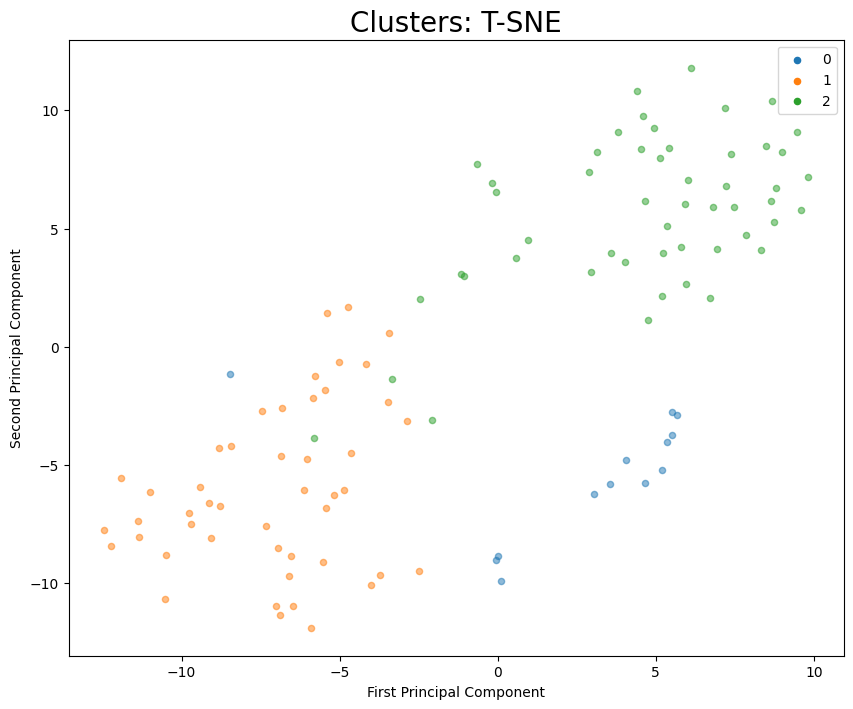

In [66]:
# Plot only labeled datapoints

# Select only the rows where the label ("Entity") is given and remove ethereum_address, label and cluster
data_with_labels = labeled_dataset[labeled_dataset["Entity"].notnull()].iloc[:, 1:-2]
pipe, data_with_labels = data_pipeline(data_with_labels)
cl_labels = make_cluster(data_with_labels, n_clusters=3, n_init=20, max_iter=500)
tsne_results_labels = calc_tsne(data_with_labels, n_components=2, perplexity=20, n_iter=500, learning_rate=100)
plot_tsne(cl_labels.labels_, tsne_results_labels)

In [67]:
pipeline, processed_data = data_pipeline(labeled_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


In [68]:
tsne_results = calc_tsne(processed_data, n_components=2, perplexity=20, n_iter=500, learning_rate=100)

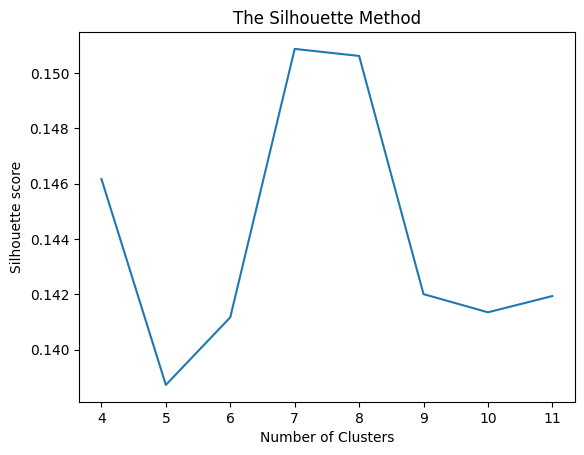

In [69]:
plot_silhouette_scores(processed_data, 4, 12)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.14950268210094353


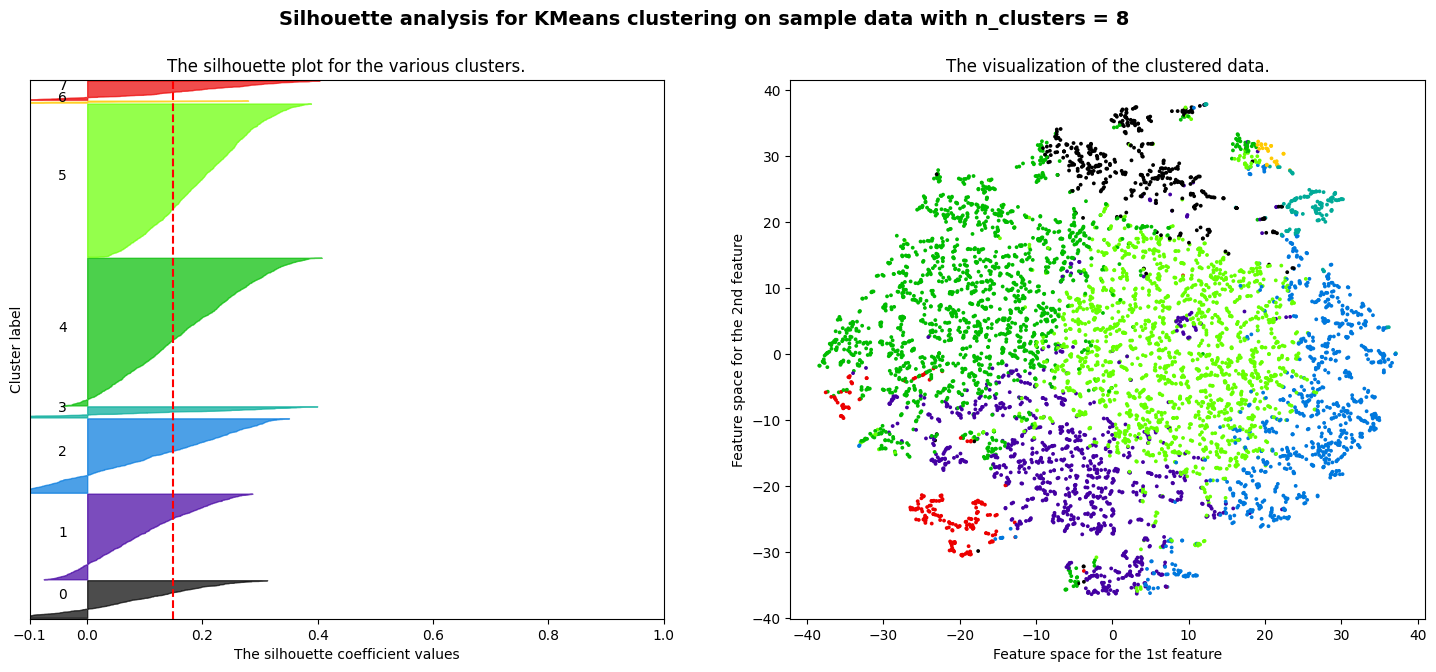

In [70]:
range_n_clusters = [8]
sils = silhouette_plotter(processed_data, range_n_clusters, tsne_results)

In [71]:
clusters = make_cluster(processed_data, n_clusters=8, n_init=20, max_iter=500)
print(np.unique(clusters.labels_))

[0 1 2 3 4 5 6 7]


In [72]:
dataset_with_clusters = assign_cluster_to_data(labeled_dataset, clusters.labels_)

In [73]:
dataset_with_clusters.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity,cluster
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,1.066724e+09,...,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281,Exchange,3
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,2.131017e+09,...,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341,Exchange,3
2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,3.502765e+09,...,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261,Exchange,3
3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,1.205682e+06,...,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40,NaN,3
4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,4.969486e+06,...,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166,NaN,3


In [74]:
dataset_with_clusters["cluster"].value_counts()

cluster
2    1729
6    1681
7     972
1     843
5     440
0     220
3     150
4      22
Name: count, dtype: int64

In [75]:
categories = ("Exchange", "Mining", "ICO Wallets")
colors = ("blue", "red", "green")

cluster_types = {}
for categ in categories:
    cluster_types[categ] = find_category_of_cluster(clusters, dataset_with_clusters, categ)

cl_types = list(cluster_types.values())

Exchange
Cluster num: 0, num of addresses: 0, cluster size: 220, lebel density: 0.0
Cluster num: 1, num of addresses: 3, cluster size: 843, lebel density: 0.3558718861209964
Cluster num: 2, num of addresses: 1, cluster size: 1729, lebel density: 0.057836899942163095
Cluster num: 3, num of addresses: 44, cluster size: 150, lebel density: 29.333333333333332
Cluster num: 4, num of addresses: 4, cluster size: 22, lebel density: 18.181818181818183
Cluster num: 5, num of addresses: 1, cluster size: 440, lebel density: 0.22727272727272727
Cluster num: 6, num of addresses: 0, cluster size: 1681, lebel density: 0.0
Cluster num: 7, num of addresses: 0, cluster size: 972, lebel density: 0.0
Mining
Cluster num: 0, num of addresses: 0, cluster size: 220, lebel density: 0.0
Cluster num: 1, num of addresses: 1, cluster size: 843, lebel density: 0.11862396204033215
Cluster num: 2, num of addresses: 7, cluster size: 1729, lebel density: 0.4048582995951417
Cluster num: 3, num of addresses: 10, cluster s

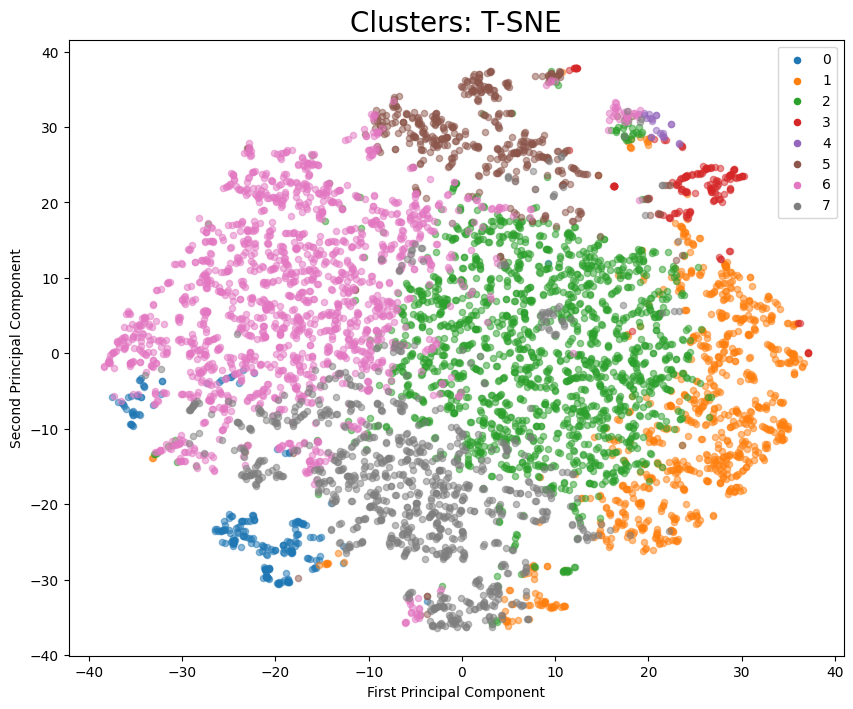

In [76]:
plot_tsne(clusters.labels_, tsne_results)

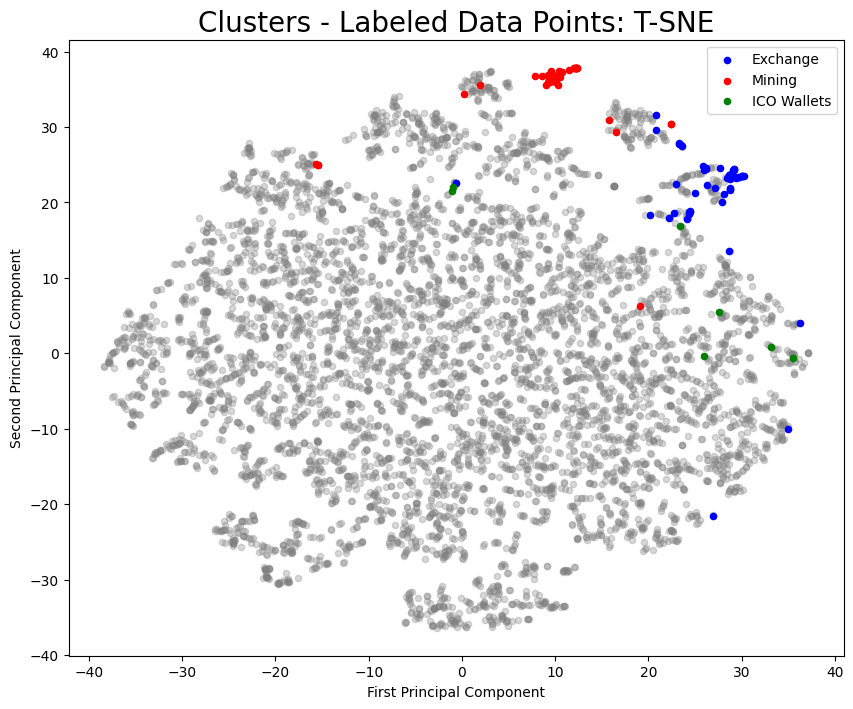

In [77]:
dflabel = labeled_dataset[labeled_dataset["Entity"].notnull()]
dflabel = dflabel[["ethereum_address", "Entity"]]
dflabel.head()
plot_tsne_with_labels(tsne_results, dataset, dflabel, categories, colors)

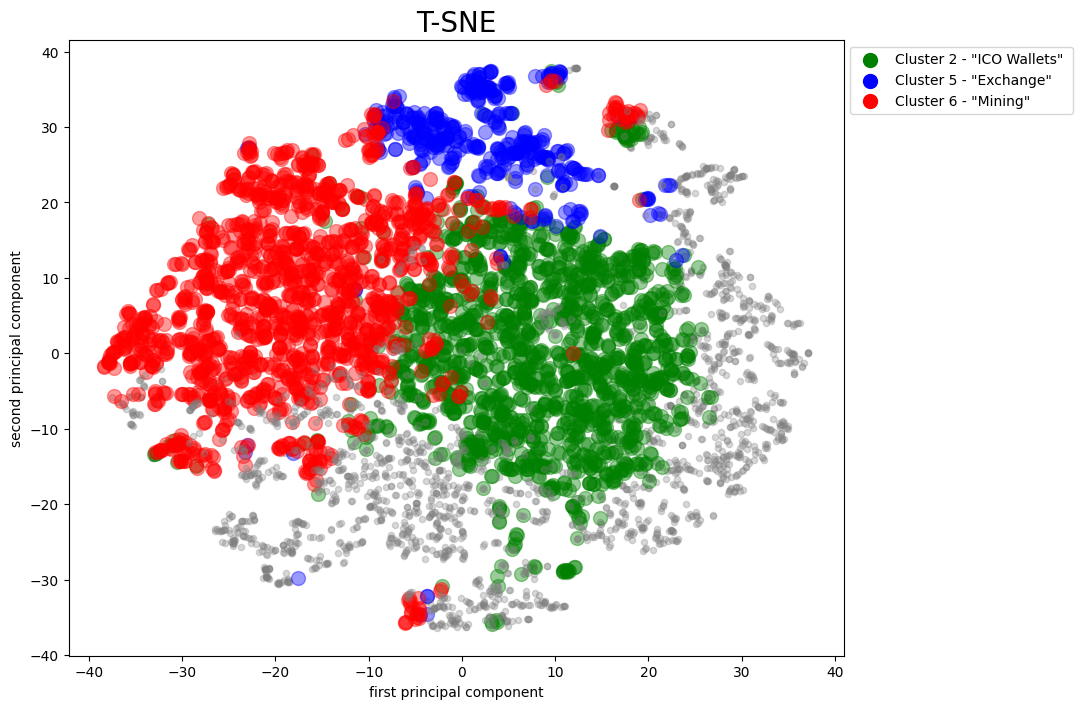

In [78]:
plot_tsne_with_labeled_clusters(tsne_results, clusters, cl_types, categories, colors)